<a href="https://colab.research.google.com/github/PriyadharshniG/House_rent_predict/blob/main/houserent_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/sample_data/houserentdhaka.csv')

In [3]:
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


In [4]:
df.tail()

,Unnamed: 0,Location,Area,Bed,Bath,Price
28795,4795,"Section 2, Mirpur, Dhaka","1,400 sqft",3,2,15 Thousand
28796,4796,"Block F, Bashundhara R-A, Dhaka","1,400 sqft",3,3,25 Thousand
28797,4797,"RK Mission Road, Gopibag, Motijheel, Dhaka","1,250 sqft",3,3,23 Thousand
28798,4798,"Ullan, West Rampura, Rampura, Dhaka","1,900 sqft",3,3,30 Thousand
28799,4799,"Vatara, Badda, Dhaka","1,150 sqft",3,2,15 Thousand


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  28800 non-null  int64 
 1   Location    28800 non-null  object
 2   Area        28800 non-null  object
 3   Bed         28800 non-null  int64 
 4   Bath        28800 non-null  int64 
 5   Price       28800 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


In [6]:

df.describe()

,Unnamed: 0,Bed,Bath
count,28800.000000,28800.000000,28800.000000
mean,1399.500000,2.511076,2.369653
std,959.182914,0.601353,0.756758
min,0.000000,1.000000,1.000000
25%,654.000000,2.000000,2.000000
50%,1309.000000,2.000000,2.000000
75%,1963.000000,3.000000,3.000000
max,4799.000000,6.000000,8.000000


In [7]:

df.isna().sum()

,0
Unnamed: 0,0
Location,0
Area,0
Bed,0
Bath,0
Price,0


In [8]:
df = df.drop(columns=["Unnamed: 0"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  28800 non-null  object
 1   Area      28800 non-null  object
 2   Bed       28800 non-null  int64 
 3   Bath      28800 non-null  int64 
 4   Price     28800 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [10]:
df['Area'] = df['Area'].str.replace(',', '').str.extract('(\d+)').astype(float)


In [11]:

df['Price'].unique()

array(['20 Thousand', '18 Thousand', '75 Thousand', '50 Thousand',
       '14 Thousand', '28 Thousand', '19 Thousand', '40 Thousand',
       '60 Thousand', '16 Thousand', '35 Thousand', '1.6 Lakh',
       '25 Thousand', '30 Thousand', '18.63 Thousand', '32 Thousand',
       '1 Lakh', '2 Lakh', '10 Thousand', '15 Thousand', '27 Thousand',
       '24 Thousand', '38 Thousand', '80 Thousand', '1.5 Lakh',
       '1.2 Lakh', '26 Thousand', '45 Thousand', '85 Thousand',
       '13 Thousand', '1.1 Lakh', '24.76 Thousand', '17 Thousand',
       '95 Thousand', '55 Thousand', '31 Thousand', '2.4 Lakh',
       '54 Thousand', '90 Thousand', '42 Thousand', '1.4 Lakh',
       '33 Thousand', '8.5 Thousand', '11 Thousand', '12 Thousand',
       '4 Lakh', '65 Thousand', '36 Thousand', '70 Thousand',
       '52.5 Thousand', '2.5 Lakh', '5 Thousand', '3.5 Lakh', '1.15 Lakh',
       '15.5 Thousand', '36.75 Thousand', '33.5 Thousand', '3 Lakh',
       '22 Thousand', '12.5 Thousand', '2.15 Lakh', '7 Thousand

In [12]:
def convert_price(price_str):
    price_str = price_str.strip()
    if "Thousand" in price_str:
        value = float(price_str.replace("Thousand", "").strip()) * 1_000
    elif "Lakh" in price_str:
        value = float(price_str.replace("Lakh", "").strip()) * 100_000
    else:
        value = None  # or handle unexpected cases
    return value

In [13]:
df['Price'] = df['Price'].apply(convert_price)

In [14]:
df = pd.get_dummies(df, columns=["Location"], drop_first=True)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X = df.drop(columns=["Price"])
y = df["Price"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
score = model.score(X_test, y_test)
print("R² Score:", score)

R² Score: 0.8027987526820068


In [20]:
import numpy as np

In [21]:
new_data = {
    'Area': [1500],
    'Bed': [3],
    'Bath': [2],

}

In [22]:
new_df = pd.DataFrame(new_data)
new_df = new_df.reindex(columns=X.columns, fill_value=0)

In [23]:
predicted_rent = model.predict(new_df)
print("Predicted Rent: {:.0f} Taka".format(predicted_rent[0]))

Predicted Rent: 32508 Taka


In [24]:
core = df.corr()

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

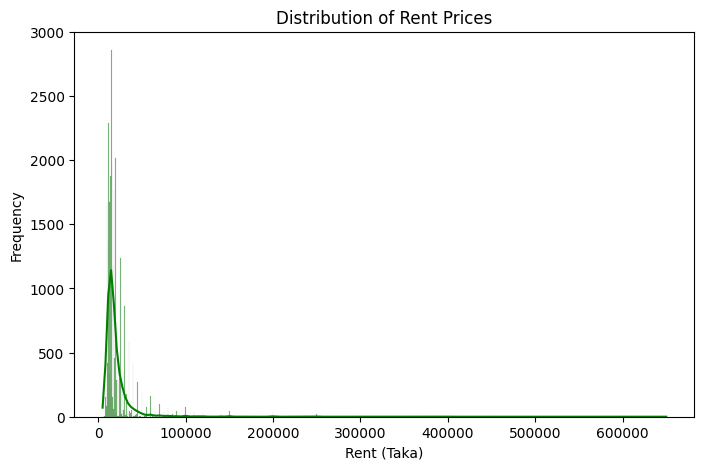

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, color='green')
plt.title("Distribution of Rent Prices")
plt.xlabel("Rent (Taka)")
plt.ylabel("Frequency")
plt.show()

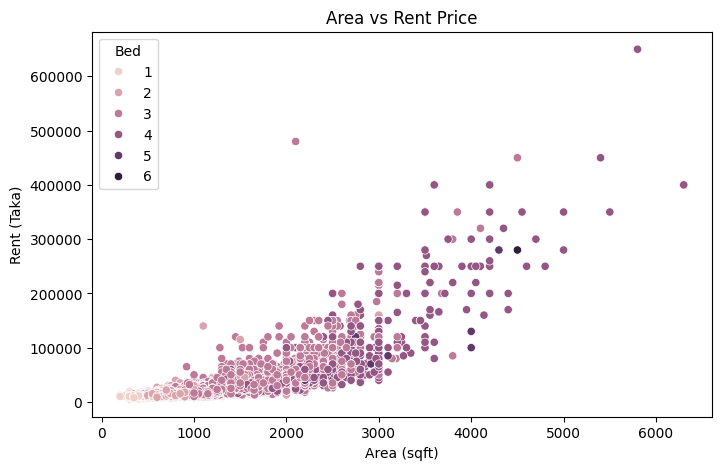

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Area', y='Price', hue='Bed')
plt.title("Area vs Rent Price")
plt.xlabel("Area (sqft)")
plt.ylabel("Rent (Taka)")
plt.show()

/tmp/ipython-input-29-2444959237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Bed', y='Price', estimator='mean', palette='magma')


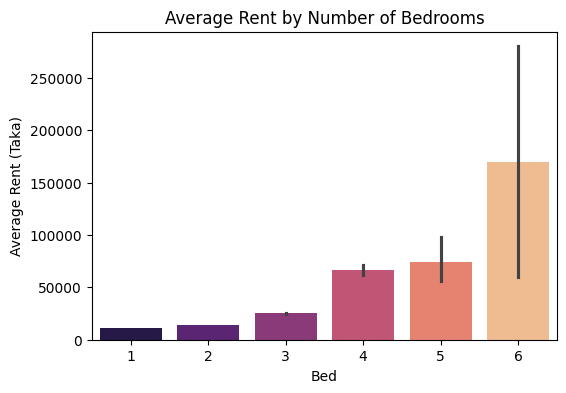

In [29]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Bed', y='Price', estimator='mean', palette='magma')
plt.title("Average Rent by Number of Bedrooms")
plt.ylabel("Average Rent (Taka)")
plt.show()

/tmp/ipython-input-30-3130162605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Bath', y='Price', palette='coolwarm')


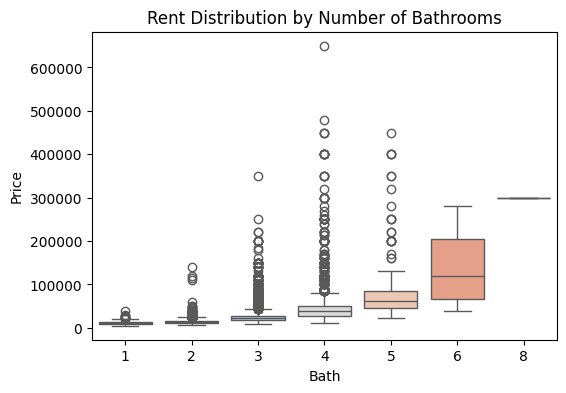

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Bath', y='Price', palette='coolwarm')
plt.title("Rent Distribution by Number of Bathrooms")
plt.show()